In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

from Preprocessing.MECO_data_split import fix_cols, demo_cols, concat_MECO_langs, lang_list

In [34]:
data = concat_MECO_langs(['ru'])

# data
data['OpSex'] = 1 - data['Sex']



In [35]:
from sklearn.model_selection import train_test_split

uv = data['SubjectID'].unique()
uv_train, uv_test = train_test_split(uv, test_size=0.1)

In [36]:
uv_test

array(['rum_20', 'rum_2', 'rum_44', 'ru_35', 'rum_11', 'rum_1', 'rum_17',
       'ru_40', 'ru_26'], dtype=object)

In [37]:
data_train = data[data['SubjectID'].isin(uv_train)]
data_test = data[data['SubjectID'].isin(uv_test)]

X_train, y_train = data_train[demo_cols + ['OpSex']], data_train['Target_Label']
X_test, y_test = data_test[demo_cols + ['OpSex']], data_test['Target_Label']

In [38]:
X_train

,motiv,IQ,Age,Sex,OpSex
3562,2.4,7.0,20,0,1
3563,2.4,7.0,20,0,1
3564,2.4,7.0,20,0,1
3565,2.4,7.0,20,0,1
3566,2.4,7.0,20,0,1
...,...,...,...,...,...
184786,3.4,8.0,29,1,0
184787,3.4,8.0,29,1,0
184788,3.4,8.0,29,1,0
184789,3.4,8.0,29,1,0


In [45]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
     # ('clf', LogisticRegression())
    ('clf', RandomForestClassifier(n_estimators=3000, min_samples_leaf=3, min_samples_split=8))
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 RandomForestClassifier(min_samples_leaf=3, min_samples_split=8,
                                        n_estimators=3000))])

In [46]:
pipeline.score(X_test, y_test)

0.6336464560204953

In [17]:
X_train

,motiv,IQ,Age,Sex,OpSex
0,3.7,7.0,30,0,1
1,3.7,7.0,30,0,1
2,3.7,7.0,30,0,1
3,3.7,7.0,30,0,1
4,3.7,7.0,30,0,1
...,...,...,...,...,...
184786,3.4,8.0,29,1,0
184787,3.4,8.0,29,1,0
184788,3.4,8.0,29,1,0
184789,3.4,8.0,29,1,0


In [23]:
np.unique(y_test)

array([2., 3., 4.])

In [14]:
X_test

,motiv,IQ,Age,Sex,OpSex
19498,3.4,5.0,18,0,1
19499,3.4,5.0,18,0,1
19500,3.4,5.0,18,0,1
19501,3.4,5.0,18,0,1
19502,3.4,5.0,18,0,1
...,...,...,...,...,...
145018,3.8,8.0,34,0,1
145019,3.8,8.0,34,0,1
145020,3.8,8.0,34,0,1
145021,3.8,8.0,34,0,1


In [2]:
from Preprocessing.MECO_data_split import make_dataset

X, y, v = make_dataset(['ru'], path_to_data='../Datasets/DataToUse/')

In [8]:
from Models.search_methods import get_custom_cv

for a, b in get_custom_cv(3, v).split(X, y):
    print(a)
    print(b)
    print()

[  4517   4518   4519 ... 184788 184789 184790]
[   0    1    2 ... 4514 4515 4516]

[     0      1      2 ... 184788 184789 184790]
[ 4517  4518  4519 ... 10447 10448 10449]

[     0      1      2 ... 184788 184789 184790]
[10450 10451 10452 ... 16534 16535 16536]

[     0      1      2 ... 184788 184789 184790]
[16537 16538 16539 ... 21660 21661 21662]

[     0      1      2 ... 184788 184789 184790]
[21663 21664 21665 ... 28049 28050 28051]

[     0      1      2 ... 184788 184789 184790]
[28052 28053 28054 ... 34499 34500 34501]

[     0      1      2 ... 184788 184789 184790]
[34502 34503 34504 ... 39980 39981 39982]

[     0      1      2 ... 184788 184789 184790]
[39983 39984 39985 ... 45877 45878 45879]

[     0      1      2 ... 184788 184789 184790]
[45880 45881 45882 ... 52619 52620 52621]

[     0      1      2 ... 184788 184789 184790]
[52622 52623 52624 ... 58831 58832 58833]

[     0      1      2 ... 184788 184789 184790]
[58834 58835 58836 ... 65953 65954 65955]

[    

In [1]:
from Preprocessing.MECO_data_split import MECODataSplit

split = MECODataSplit(['ru'])

In [2]:
X, y = split.split_by_unique_values(split_cols=['Word', 'Text_ID'], resample=None, test_size=0)

SyntaxError: invalid syntax (<unknown>, line 1)

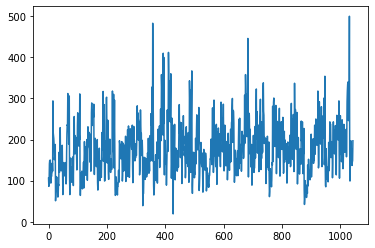

In [8]:
from matplotlib import pyplot as plt

plt.plot([len(a) for a in X])